In [1]:
#import libraries
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib as mp
import matplotlib.pyplot as plt

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                              \failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|1_73_pypy|4_73_pypy|3_73_pypy|2_73_pypy']
  - geopy -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']
  - rsa -> python[version='

## Getting NYC Neighborhoods Data

In [2]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
    

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

## Creating our initial dataframe 

### Here we will be creaing a data frame combining Neighborhoods, Boroughs, and Community Districts

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [11]:
neighborhoods.shape

(306, 4)

In [12]:
# The code was removed by Watson Studio for sharing.

,Neighborhood,Community District,Borough
0,Wakefield,Bronx CB 12,Bronx
1,Co-op City,Bronx CB 10,Bronx
2,Eastchester,Bronx CB 12,Bronx
3,Fieldston,Bronx CB 8,Bronx
4,Riverdale,Bronx CB 8,Bronx


### combining two dataframes into one with mostly relevant information

In [13]:
comms_neighs=pd.merge(df_data_7, neighborhoods, on=['Neighborhood','Borough'])

In [14]:
comms_neighs

,Neighborhood,Community District,Borough,Latitude,Longitude
0,Wakefield,Bronx CB 12,Bronx,40.894705,-73.847201
1,Co-op City,Bronx CB 10,Bronx,40.874294,-73.829939
2,Eastchester,Bronx CB 12,Bronx,40.887556,-73.827806
3,Fieldston,Bronx CB 8,Bronx,40.895437,-73.905643
4,Riverdale,Bronx CB 8,Bronx,40.890834,-73.912585
5,Kingsbridge,Bronx CB 8,Bronx,40.881687,-73.902818
6,Marble Hill,Bronx CB 8,Manhattan,40.876551,-73.910660
7,Woodlawn,Bronx CB 12,Bronx,40.898273,-73.867315
8,Norwood,Bronx CB 7,Bronx,40.877224,-73.879391
9,Williamsbridge,Bronx CB 12,Bronx,40.881039,-73.857446


In [15]:
comms_neighs.drop_duplicates(subset=['Neighborhood','Borough', 'Latitude', 'Longitude'])

,Neighborhood,Community District,Borough,Latitude,Longitude
0,Wakefield,Bronx CB 12,Bronx,40.894705,-73.847201
1,Co-op City,Bronx CB 10,Bronx,40.874294,-73.829939
2,Eastchester,Bronx CB 12,Bronx,40.887556,-73.827806
3,Fieldston,Bronx CB 8,Bronx,40.895437,-73.905643
4,Riverdale,Bronx CB 8,Bronx,40.890834,-73.912585
5,Kingsbridge,Bronx CB 8,Bronx,40.881687,-73.902818
6,Marble Hill,Bronx CB 8,Manhattan,40.876551,-73.910660
7,Woodlawn,Bronx CB 12,Bronx,40.898273,-73.867315
8,Norwood,Bronx CB 7,Bronx,40.877224,-73.879391
9,Williamsbridge,Bronx CB 12,Bronx,40.881039,-73.857446


In [16]:
manhattan_data = comms_neighs[comms_neighs['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Neighborhood,Community District,Borough,Latitude,Longitude
0,Marble Hill,Bronx CB 8,Manhattan,40.876551,-73.910660
1,Chinatown,Manhattan CB 3,Manhattan,40.715618,-73.994279
2,Washington Heights,Manhattan CB 12,Manhattan,40.851903,-73.936900
3,Inwood,Manhattan CB 12,Manhattan,40.867684,-73.921210
4,Hamilton Heights,Manhattan CB 9,Manhattan,40.823604,-73.949688


In [17]:
brooklyn_data = comms_neighs[comms_neighs['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Neighborhood,Community District,Borough,Latitude,Longitude
0,Bay Ridge,Brooklyn CB 10,Brooklyn,40.625801,-74.030621
1,Bensonhurst,Brooklyn CB 11,Brooklyn,40.611009,-73.995180
2,Sunset Park,Brooklyn CB 7,Brooklyn,40.645103,-74.010316
3,Greenpoint,Brooklyn CB 1,Brooklyn,40.730201,-73.954241
4,Gravesend,Brooklyn CB 11,Brooklyn,40.595260,-73.973471


In [18]:
bronx_data = comms_neighs[comms_neighs['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data

,Neighborhood,Community District,Borough,Latitude,Longitude
0,Wakefield,Bronx CB 12,Bronx,40.894705,-73.847201
1,Co-op City,Bronx CB 10,Bronx,40.874294,-73.829939
2,Eastchester,Bronx CB 12,Bronx,40.887556,-73.827806
3,Fieldston,Bronx CB 8,Bronx,40.895437,-73.905643
4,Riverdale,Bronx CB 8,Bronx,40.890834,-73.912585
5,Kingsbridge,Bronx CB 8,Bronx,40.881687,-73.902818
6,Woodlawn,Bronx CB 12,Bronx,40.898273,-73.867315
7,Norwood,Bronx CB 7,Bronx,40.877224,-73.879391
8,Williamsbridge,Bronx CB 12,Bronx,40.881039,-73.857446
9,Baychester,Bronx CB 12,Bronx,40.866858,-73.835798


In [19]:
queens_data = comms_neighs[comms_neighs['Borough'] == 'Queens'].reset_index(drop=True)
queens_data

,Neighborhood,Community District,Borough,Latitude,Longitude
0,Astoria,Queens CB 1,Queens,40.768509,-73.915654
1,Woodside,Queens CB 2,Queens,40.746349,-73.901842
2,Jackson Heights,Queens CB 3,Queens,40.751981,-73.882821
3,Elmhurst,Queens CB 4,Queens,40.744049,-73.881656
4,Howard Beach,Queens CB 10,Queens,40.654225,-73.838138
5,Corona,Queens CB 4,Queens,40.742382,-73.856825
6,Forest Hills,Queens CB 6,Queens,40.725264,-73.844475
7,Kew Gardens,Queens CB 9,Queens,40.705179,-73.829819
8,Richmond Hill,Queens CB 9,Queens,40.697947,-73.831833
9,Flushing,Queens CB 7,Queens,40.764454,-73.831773


In [20]:
staten_island_data = comms_neighs[comms_neighs['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_island_data

,Neighborhood,Community District,Borough,Latitude,Longitude
0,St. George,Staten Island CB 1,Staten Island,40.644982,-74.079353
1,New Brighton,Staten Island CB 1,Staten Island,40.640615,-74.087017
2,Stapleton,Staten Island CB 1,Staten Island,40.626928,-74.077902
3,Rosebank,Staten Island CB 1,Staten Island,40.615305,-74.069805
4,West Brighton,Staten Island CB 1,Staten Island,40.631879,-74.107182
5,Grymes Hill,Staten Island CB 1,Staten Island,40.624185,-74.087248
6,Todt Hill,Staten Island CB 2,Staten Island,40.597069,-74.111329
7,South Beach,Staten Island CB 2,Staten Island,40.580247,-74.079553
8,Port Richmond,Staten Island CB 1,Staten Island,40.633669,-74.129434
9,Mariner's Harbor,Staten Island CB 1,Staten Island,40.632546,-74.150085


In [21]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [22]:
address_m = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_m = geolocator.geocode(address_m)
latitude_m = location_m.latitude
longitude_m = location_m.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude_m, longitude_m))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [23]:
address_bk = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_bk = geolocator.geocode(address_bk)
latitude_bk = location_bk.latitude
longitude_bk = location_bk.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude_bk, longitude_bk))

The geograpical coordinate of Brooklyn are 40.6501024, -73.9495829.


In [24]:
address_bx = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_bx = geolocator.geocode(address_bx)
latitude_bx = location_bx.latitude
longitude_bx = location_bx.longitude
print('The geograpical coordinate of The Bronx are {}, {}.'.format(latitude_bx, longitude_bx))

The geograpical coordinate of The Bronx are 40.8466508, -73.8785937.


In [25]:
address_qn = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_qn = geolocator.geocode(address_qn)
latitude_qn = location_qn.latitude
longitude_qn = location_qn.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude_qn, longitude_qn))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [26]:
address_si = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location_si = geolocator.geocode(address_si)
latitude_si = location_si.latitude
longitude_si = location_si.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude_si, longitude_si))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


## Using Foursquare to get preschool venues in the neighborhoods

In [27]:
CLIENT_ID = '1YFANG4CF3WP2NPCIES0COJ3F2QI4VBLGJF1HCAHBXPIJY0R' # your Foursquare ID
CLIENT_SECRET = 'TGRK15245ANJ3SPZRMAKFRMXHQPHG34HV43UD20YO0FHF1JO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1YFANG4CF3WP2NPCIES0COJ3F2QI4VBLGJF1HCAHBXPIJY0R
CLIENT_SECRET:TGRK15245ANJ3SPZRMAKFRMXHQPHG34HV43UD20YO0FHF1JO


In [28]:
LIMIT = 500
radius = 600
url ='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius,
    LIMIT,
    'Preschool')
url

'https://api.foursquare.com/v2/venues/explore?&client_id=1YFANG4CF3WP2NPCIES0COJ3F2QI4VBLGJF1HCAHBXPIJY0R&client_secret=TGRK15245ANJ3SPZRMAKFRMXHQPHG34HV43UD20YO0FHF1JO&v=20180605&ll=40.7127281,-74.0060152&radius=600&limit=500&query=Preschool'

In [29]:
preschool_results=requests.get(url).json()

In [30]:
preschool_results

{'meta': {'code': 200, 'requestId': '5fd814fb2e172d2de0bb2697'},
 'response': {'warning': {'text': 'There aren\'t a lot of results for "Preschool." Try something more general, reset your filters, or expand the search area.'},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'query': 'preschool',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 40.718128105400005,
    'lng': -73.99890438476103},
   'sw': {'lat': 40.707328094599994, 'lng': -74.01312601523895}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5a8277253c858d23f53becd4',
       'name': 'Kiddie Academy of Tribeca',
       'location': {'address': '72 Reade St',
        'lat': 40.71544,
        'lng': -74.00

In [31]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [32]:
venues = preschool_results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Kiddie Academy of Tribeca,Preschool,40.715440,-74.006717
1,Tribeca KinderCare,Preschool,40.716574,-74.010501
2,Smarter Toddler Nursery & Preschool,Nursery School,40.708273,-74.006017


In [33]:
def getNearbyVenues(cd, names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for cd, name, lat, lng in zip(cd, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT,
            'Preschool')
            
        # make the GET request
        preschool_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            cd,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'])  
             for v in preschool_results]) 
                    
                

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community District','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [34]:
nyc_preschools=getNearbyVenues(cd=comms_neighs['Community District'], names=comms_neighs['Neighborhood'],
                                    latitudes=comms_neighs['Latitude'], 
                                    longitudes=comms_neighs['Longitude'])


Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

Preschools Throughout NYC

In [35]:
nyc_preschools

,Community District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Bronx CB 12,Wakefield,40.894705,-73.847201,Anna's Group Family Daycare and Preschool,40.887512,-73.850757
1,Bronx CB 12,Wakefield,40.894705,-73.847201,Beanstalk Academy,40.886879,-73.860671
2,Bronx CB 10,Co-op City,40.874294,-73.829939,Handprints Daycare,40.870680,-73.847211
3,Bronx CB 12,Eastchester,40.887556,-73.827806,Anna's Group Family Daycare and Preschool,40.887512,-73.850757
4,Bronx CB 8,Fieldston,40.895437,-73.905643,Bright Horizons at Riverdale,40.885393,-73.915039
5,Bronx CB 8,Fieldston,40.895437,-73.905643,MMC- Van Cortlandt Center,40.882779,-73.893862
6,Bronx CB 8,Fieldston,40.895437,-73.905643,BedRock Preschool,40.884940,-73.912182
7,Bronx CB 8,Fieldston,40.895437,-73.905643,Spuyten Duyvil Preschool,40.879244,-73.907205
8,Bronx CB 8,Riverdale,40.890834,-73.912585,Bright Horizons at Riverdale,40.885393,-73.915039
9,Bronx CB 8,Riverdale,40.890834,-73.912585,Riverdale Community School,40.878190,-73.918390


In [36]:
nyc_preschools["Neighborhood"].value_counts()

Upper East Side              23
Upper West Side              22
Carnegie Hill                22
Soho                         22
Little Italy                 20
Flatiron                     20
Greenwich Village            20
Gramercy                     19
Lenox Hill                   19
Murray Hill                  19
Chinatown                    19
Midtown                      19
Civic Center                 18
Park Slope                   18
Stuyvesant Town              18
Fulton Ferry                 17
Lower East Side              17
Fort Greene                  17
Gowanus                      17
Boerum Hill                  17
Manhattan Valley             16
Lincoln Square               16
Sutton Place                 16
West Village                 16
Tribeca                      16
Roosevelt Island             16
Midtown South                16
Noho                         16
East Village                 16
Prospect Heights             15
Tudor City                   15
Brooklyn

Preschools in Manhattan

In [37]:
m_preschools= getNearbyVenues(cd=manhattan_data['Community District'],names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
m_preschools


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


,Community District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Bronx CB 8,Marble Hill,40.876551,-73.910660,Riverdale Community School,40.878190,-73.918390
1,Bronx CB 8,Marble Hill,40.876551,-73.910660,Bright Horizons at Riverdale,40.885393,-73.915039
2,Bronx CB 8,Marble Hill,40.876551,-73.910660,MMC- Van Cortlandt Center,40.882779,-73.893862
3,Bronx CB 8,Marble Hill,40.876551,-73.910660,ABC Training Center,40.862381,-73.900394
4,Bronx CB 8,Marble Hill,40.876551,-73.910660,FYDC Office North East,40.865536,-73.892214
5,Manhattan CB 3,Chinatown,40.715618,-73.994279,Preschool Of America,40.712042,-73.994511
6,Manhattan CB 3,Chinatown,40.715618,-73.994279,Elements Preschool Kindergarten New York,40.718792,-73.986458
7,Manhattan CB 3,Chinatown,40.715618,-73.994279,Love A Lot Preschool,40.718792,-73.986458
8,Manhattan CB 3,Chinatown,40.715618,-73.994279,FasTracKids / Evolution Enrichment Center,40.719937,-73.991772
9,Manhattan CB 3,Chinatown,40.715618,-73.994279,Escuela Hispana Montessori,40.721176,-73.984572


In [38]:
m_preschools["Neighborhood"].value_counts()

Upper East Side        23
Upper West Side        22
Carnegie Hill          22
Soho                   22
Flatiron               20
Greenwich Village      20
Little Italy           20
Gramercy               19
Lenox Hill             19
Chinatown              19
Midtown                19
Stuyvesant Town        18
Civic Center           18
Lower East Side        17
Roosevelt Island       16
Sutton Place           16
Midtown South          16
Tribeca                16
East Village           16
West Village           16
Noho                   16
Murray Hill            16
Lincoln Square         16
Manhattan Valley       16
Tudor City             15
Turtle Bay             14
Battery Park City      14
Yorkville              14
Chelsea                14
East Harlem            13
Hudson Yards           13
Clinton                12
Morningside Heights    12
Financial District     12
Manhattanville          5
Marble Hill             5
Central Harlem          4
Inwood                  3
Hamilton Hei

In [39]:
print(m_preschools.shape)

(593, 7)


Brooklyn Preschools

In [40]:
bk_preschools= getNearbyVenues(cd=brooklyn_data['Community District'], names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )
bk_preschools

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


,Community District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Brooklyn CB 10,Bay Ridge,40.625801,-74.030621,The Learning Experience - Brooklyn Bay Ridge,40.627310,-74.010300
1,Brooklyn CB 10,Bay Ridge,40.625801,-74.030621,Fastrackids / Eye Level Learning Center,40.619602,-74.008528
2,Brooklyn CB 10,Bay Ridge,40.625801,-74.030621,Our Saviour's Lutheran Preschool,40.626989,-74.026202
3,Brooklyn CB 11,Bensonhurst,40.611009,-73.995180,Mommy & Me,40.606358,-73.989731
4,Brooklyn CB 11,Bensonhurst,40.611009,-73.995180,Kinderstuff V Daycare and Learning Center,40.605785,-73.990585
5,Brooklyn CB 11,Bensonhurst,40.611009,-73.995180,Little Scholars Daycare Center V,40.618823,-73.985978
6,Brooklyn CB 11,Bensonhurst,40.611009,-73.995180,HeartShare Early Childhood Center,40.603630,-74.005249
7,Brooklyn CB 11,Bensonhurst,40.611009,-73.995180,Fastrackids / Eye Level Learning Center,40.619602,-74.008528
8,Brooklyn CB 7,Sunset Park,40.645103,-74.010316,Athena Scholars 雅典娜學園,40.638821,-74.005486
9,Brooklyn CB 7,Sunset Park,40.645103,-74.010316,Sunny Skies Preschool,40.642711,-73.995351


In [41]:
bk_preschools["Neighborhood"].value_counts()

Park Slope                   18
Fulton Ferry                 17
Boerum Hill                  17
Fort Greene                  17
Gowanus                      17
Prospect Heights             15
Downtown                     14
Brooklyn Heights             14
Carroll Gardens              14
Dumbo                        14
Windsor Terrace              13
Clinton Hill                 13
Williamsburg                 12
South Side                   11
North Side                   11
Cobble Hill                  10
Vinegar Hill                 10
Greenpoint                    8
East Williamsburg             7
Crown Heights                 7
Prospect Lefferts Gardens     6
Prospect Park South           6
Erasmus                       6
Ditmas Park                   6
Bushwick                      5
Weeksville                    5
Bedford Stuyvesant            5
Bensonhurst                   5
Sunset Park                   5
Kensington                    5
Wingate                       5
Gravesen

Bronx Preschools

In [42]:
bx_preschools= getNearbyVenues(cd=bronx_data['Community District'],names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )
bx_preschools

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


,Community District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Bronx CB 12,Wakefield,40.894705,-73.847201,Anna's Group Family Daycare and Preschool,40.887512,-73.850757
1,Bronx CB 12,Wakefield,40.894705,-73.847201,Beanstalk Academy,40.886879,-73.860671
2,Bronx CB 10,Co-op City,40.874294,-73.829939,Handprints Daycare,40.870680,-73.847211
3,Bronx CB 12,Eastchester,40.887556,-73.827806,Anna's Group Family Daycare and Preschool,40.887512,-73.850757
4,Bronx CB 8,Fieldston,40.895437,-73.905643,Bright Horizons at Riverdale,40.885393,-73.915039
5,Bronx CB 8,Fieldston,40.895437,-73.905643,MMC- Van Cortlandt Center,40.882779,-73.893862
6,Bronx CB 8,Fieldston,40.895437,-73.905643,BedRock Preschool,40.884940,-73.912182
7,Bronx CB 8,Fieldston,40.895437,-73.905643,Spuyten Duyvil Preschool,40.879244,-73.907205
8,Bronx CB 8,Riverdale,40.890834,-73.912585,Bright Horizons at Riverdale,40.885393,-73.915039
9,Bronx CB 8,Riverdale,40.890834,-73.912585,Riverdale Community School,40.878190,-73.918390


Queens Preschools

In [43]:
qn_preschools= getNearbyVenues(cd=queens_data['Community District'],names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )
qn_preschools

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


,Community District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Queens CB 1,Astoria,40.768509,-73.915654,Perfect Angels Child Care Inc,40.766293,-73.911030
1,Queens CB 1,Astoria,40.768509,-73.915654,New Milestone Preschool,40.771379,-73.919433
2,Queens CB 1,Astoria,40.768509,-73.915654,The Learning Experience - Astoria,40.762630,-73.924420
3,Queens CB 1,Astoria,40.768509,-73.915654,St Margaret Mary Church Headstart Program,40.773727,-73.930577
4,Queens CB 2,Woodside,40.746349,-73.901842,Little Elms Child Care Center,40.745479,-73.888022
5,Queens CB 2,Woodside,40.746349,-73.901842,Rainbow Preschool Woodside NY,40.742522,-73.892790
6,Queens CB 2,Woodside,40.746349,-73.901842,Red Apple Preschool of America Elmhurst,40.740589,-73.880241
7,Queens CB 3,Jackson Heights,40.751981,-73.882821,Little Elms Child Care Center,40.745479,-73.888022
8,Queens CB 3,Jackson Heights,40.751981,-73.882821,Rainbow Preschool Woodside NY,40.742522,-73.892790
9,Queens CB 3,Jackson Heights,40.751981,-73.882821,Red Apple Preschool of America Elmhurst,40.740589,-73.880241


Staten Island Preschools

In [44]:
si_preschools= getNearbyVenues(cd=staten_island_data['Community District'],names=staten_island_data['Neighborhood'],
                                   latitudes=staten_island_data['Latitude'],
                                   longitudes=staten_island_data['Longitude']
                                  )
si_preschools

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


,Community District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Staten Island CB 1,St. George,40.644982,-74.079353,Building Blocks Montessori School,40.631236,-74.090943
1,Staten Island CB 1,New Brighton,40.640615,-74.087017,Building Blocks Montessori School,40.631236,-74.090943
2,Staten Island CB 1,Stapleton,40.626928,-74.077902,Building Blocks Montessori School,40.631236,-74.090943
3,Staten Island CB 1,West Brighton,40.631879,-74.107182,Building Blocks Montessori School,40.631236,-74.090943
4,Staten Island CB 1,Grymes Hill,40.624185,-74.087248,Building Blocks Montessori School,40.631236,-74.090943
5,Staten Island CB 2,South Beach,40.580247,-74.079553,Wonder Years Preschool,40.581173,-74.092132
6,Staten Island CB 1,Mariner's Harbor,40.632546,-74.150085,Zion Preschool,40.617474,-74.146317
7,Staten Island CB 2,New Springville,40.594252,-74.164960,Great Beginnings Infant And Toddler Center,40.592773,-74.162384
8,Staten Island CB 2,New Springville,40.594252,-74.164960,Big Bird's Playhouse,40.602489,-74.162861
9,Staten Island CB 2,New Springville,40.594252,-74.164960,Ivy Prep Early Learning Academy of Staten Island,40.604834,-74.161828


In [45]:
community_districts=pd.read_html('https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City')[0]

In [46]:
community_districts

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods
0,Bronx CB 1,7.17,91497,12761,"Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,5.54,52246,9792,"Hunts Point, Longwood"
2,Bronx CB 3,4.07,79762,19598,"Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,5.28,146441,27735,"Concourse, Highbridge"
4,Bronx CB 5,3.55,128200,36145,"Fordham, Morris Heights, Mount Hope, Universit..."
5,Bronx CB 6,4.01,83268,20765,"Bathgate, Belmont, East Tremont, West Farms"
6,Bronx CB 7,4.84,139286,28778,"Bedford Park, Norwood, University Heights"
7,Bronx CB 8,8.83,101731,11521,"Fieldston, Kingsbridge, Kingsbridge Heights, M..."
8,Bronx CB 9,12.41,172298,13884,"Bronx River, Bruckner, Castle Hill, Clason Poi..."
9,Bronx CB 10,16.76,120392,7183,"City Island, Co-op City, Locust Point, Pelham ..."


In [47]:
comms_neighs

,Neighborhood,Community District,Borough,Latitude,Longitude
0,Wakefield,Bronx CB 12,Bronx,40.894705,-73.847201
1,Co-op City,Bronx CB 10,Bronx,40.874294,-73.829939
2,Eastchester,Bronx CB 12,Bronx,40.887556,-73.827806
3,Fieldston,Bronx CB 8,Bronx,40.895437,-73.905643
4,Riverdale,Bronx CB 8,Bronx,40.890834,-73.912585
5,Kingsbridge,Bronx CB 8,Bronx,40.881687,-73.902818
6,Marble Hill,Bronx CB 8,Manhattan,40.876551,-73.910660
7,Woodlawn,Bronx CB 12,Bronx,40.898273,-73.867315
8,Norwood,Bronx CB 7,Bronx,40.877224,-73.879391
9,Williamsbridge,Bronx CB 12,Bronx,40.881039,-73.857446


In [48]:
grouped_comms = comms_neighs.groupby("Community District")

grouped_comms = grouped_comms.agg({"Neighborhood": "nunique"})

grouped_comms = grouped_comms.reset_index()

In [49]:
grouped_comms

,Community District,Neighborhood
0,Bronx CB 1,3
1,Bronx CB 10,8
2,Bronx CB 11,6
3,Bronx CB 12,7
4,Bronx CB 2,2
5,Bronx CB 3,2
6,Bronx CB 4,4
7,Bronx CB 5,4
8,Bronx CB 6,3
9,Bronx CB 7,3


### Child Population In Each District

In [50]:

body = client_9c23b7e9c57a4422b5720e1fce1e5792.get_object(Bucket='capstone-donotdelete-pr-s4lq6ffhgoc0uo',Key='child population (under 5) by community distric.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5


,Community District,Population of Children Under 5
0,Bronx CB 1,5962
1,Bronx CB 2,3404
2,Bronx CB 3,7414
3,Bronx CB 4,12191
4,Bronx CB 5,11080
5,Bronx CB 6,7739
6,Bronx CB 7,10725
7,Bronx CB 8,6729
8,Bronx CB 9,10738
9,Bronx CB 10,4437


In [51]:
childcount=grouped_comms.join(df_data_5.set_index('Community District'), on='Community District')

In [52]:
childcount

,Community District,Neighborhood,Population of Children Under 5
0,Bronx CB 1,3,5962.0
1,Bronx CB 10,8,4437.0
2,Bronx CB 11,6,8285.0
3,Bronx CB 12,7,11343.0
4,Bronx CB 2,2,3404.0
5,Bronx CB 3,2,7414.0
6,Bronx CB 4,4,12191.0
7,Bronx CB 5,4,11080.0
8,Bronx CB 6,3,7739.0
9,Bronx CB 7,3,10725.0


In [53]:
mcd1 = m_preschools[m_preschools['Community District'] == 'Manhattan CB 1'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd1

,Community District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Manhattan CB 1,Tribeca,40.721522,-74.010683,Educove,40.718149,-74.013762
1,Manhattan CB 1,Tribeca,40.721522,-74.010683,Bright Horizons at Tribeca,40.720460,-74.008842
2,Manhattan CB 1,Tribeca,40.721522,-74.010683,Tribeca KinderCare,40.716574,-74.010501
3,Manhattan CB 1,Tribeca,40.721522,-74.010683,Kiddie Academy of Tribeca,40.715440,-74.006717
4,Manhattan CB 1,Tribeca,40.721522,-74.010683,Perry School,40.736854,-74.009136
5,Manhattan CB 1,Tribeca,40.721522,-74.010683,Bright Horizons at West Village,40.731475,-74.008157
6,Manhattan CB 1,Tribeca,40.721522,-74.010683,Bright Horizons Backup Care,40.707726,-74.009850
7,Manhattan CB 1,Tribeca,40.721522,-74.010683,Bright Horizons in 90 Washington on West Street,40.708081,-74.014911
8,Manhattan CB 1,Tribeca,40.721522,-74.010683,Pine Street School,40.707081,-74.009575
9,Manhattan CB 1,Tribeca,40.721522,-74.010683,Village preschool Center,40.734677,-74.000437


### Number of Preschools in Each District (Difficult Way)

In [54]:
mcd2= m_preschools[m_preschools['Community District'] == 'Manhattan CB 2'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd3= m_preschools[m_preschools['Community District'] == 'Manhattan CB 3'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd4= m_preschools[m_preschools['Community District'] == 'Manhattan CB 4'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd5= m_preschools[m_preschools['Community District'] == 'Manhattan CB 5'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd6= m_preschools[m_preschools['Community District'] == 'Manhattan CB 6'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd7= m_preschools[m_preschools['Community District'] == 'Manhattan CB 7'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd8= m_preschools[m_preschools['Community District'] == 'Manhattan CB 8'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd9= m_preschools[m_preschools['Community District'] == 'Manhattan CB 9'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd10= m_preschools[m_preschools['Community District'] == 'Manhattan CB 10'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd11= m_preschools[m_preschools['Community District'] == 'Manhattan CB 11'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
mcd12= m_preschools[m_preschools['Community District'] == 'Manhattan CB 12'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)

In [55]:
bkcd1=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 1'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd2=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 2'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd3=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 3'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd4=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 4'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd5=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 5'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd6=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 6'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd7=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 7'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd8=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 8'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd9=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 9'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd10=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 10'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd11=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 11'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd12=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 12'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd13=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 13'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd14=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 14'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd15=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 15'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd16=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 16'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd17=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 17'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bkcd18=bk_preschools[bk_preschools['Community District']=='Brooklyn CB 18'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)

In [56]:
bxcd1=bx_preschools[bx_preschools['Community District']=='Bronx CB 1'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd2=bx_preschools[bx_preschools['Community District']=='Bronx CB 2'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd3=bx_preschools[bx_preschools['Community District']=='Bronx CB 3'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd4=bx_preschools[bx_preschools['Community District']=='Bronx CB 4'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd5=bx_preschools[bx_preschools['Community District']=='Bronx CB 5'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd6=bx_preschools[bx_preschools['Community District']=='Bronx CB 6'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd7=bx_preschools[bx_preschools['Community District']=='Bronx CB 7'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd8=bx_preschools[bx_preschools['Community District']=='Bronx CB 8'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd9=bx_preschools[bx_preschools['Community District']=='Bronx CB 9'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd10=bx_preschools[bx_preschools['Community District']=='Bronx CB 10'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd11=bx_preschools[bx_preschools['Community District']=='Bronx CB 11'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
bxcd12=bx_preschools[bx_preschools['Community District']=='Bronx CB 12'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)

In [57]:
qncd1=qn_preschools[qn_preschools['Community District']=='Queens CB 1'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd2=qn_preschools[qn_preschools['Community District']=='Queens CB 2'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd3=qn_preschools[qn_preschools['Community District']=='Queens CB 3'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd4=qn_preschools[qn_preschools['Community District']=='Queens CB 4'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd5=qn_preschools[qn_preschools['Community District']=='Queens CB 5'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd6=qn_preschools[qn_preschools['Community District']=='Queens CB 6'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd7=qn_preschools[qn_preschools['Community District']=='Queens CB 7'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd8=qn_preschools[qn_preschools['Community District']=='Queens CB 8'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd9=qn_preschools[qn_preschools['Community District']=='Queens CB 9'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd10=qn_preschools[qn_preschools['Community District']=='Queens CB 10'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd11=qn_preschools[qn_preschools['Community District']=='Queens CB 11'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd12=qn_preschools[qn_preschools['Community District']=='Queens CB 12'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd13=qn_preschools[qn_preschools['Community District']=='Queens CB 13'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
qncd14=qn_preschools[qn_preschools['Community District']=='Queens CB 14'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)

In [58]:
sicd1=si_preschools[si_preschools['Community District']=='Staten Island CB 1'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
sicd2=si_preschools[si_preschools['Community District']=='Staten Island CB 2'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)
sicd3=si_preschools[si_preschools['Community District']=='Staten Island CB 3'].drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude']).reset_index(drop=True)

In [59]:
sicd1

,Community District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Staten Island CB 1,St. George,40.644982,-74.079353,Building Blocks Montessori School,40.631236,-74.090943
1,Staten Island CB 1,Mariner's Harbor,40.632546,-74.150085,Zion Preschool,40.617474,-74.146317
2,Staten Island CB 1,Westerleigh,40.621090,-74.133041,Eye Level Learning Center,40.609178,-74.148356
3,Staten Island CB 1,Graniteville,40.620172,-74.153152,Ivy Prep Early Learning Academy of Staten Island,40.604834,-74.161828


In [60]:
sicd1.count()

Community District        4
Neighborhood              4
Neighborhood Latitude     4
Neighborhood Longitude    4
Venue                     4
Venue Latitude            4
Venue Longitude           4
dtype: int64

In [61]:
sicd2.count()

Community District        7
Neighborhood              7
Neighborhood Latitude     7
Neighborhood Longitude    7
Venue                     7
Venue Latitude            7
Venue Longitude           7
dtype: int64

In [62]:
sicd3.count()

Community District        4
Neighborhood              4
Neighborhood Latitude     4
Neighborhood Longitude    4
Venue                     4
Venue Latitude            4
Venue Longitude           4
dtype: int64

In [63]:
qncd1.count()

Community District        13
Neighborhood              13
Neighborhood Latitude     13
Neighborhood Longitude    13
Venue                     13
Venue Latitude            13
Venue Longitude           13
dtype: int64

In [64]:
qncd2.count()

Community District        9
Neighborhood              9
Neighborhood Latitude     9
Neighborhood Longitude    9
Venue                     9
Venue Latitude            9
Venue Longitude           9
dtype: int64

In [65]:
qncd3.count()

Community District        4
Neighborhood              4
Neighborhood Latitude     4
Neighborhood Longitude    4
Venue                     4
Venue Latitude            4
Venue Longitude           4
dtype: int64

In [66]:
qncd4.count()

Community District        9
Neighborhood              9
Neighborhood Latitude     9
Neighborhood Longitude    9
Venue                     9
Venue Latitude            9
Venue Longitude           9
dtype: int64

In [67]:
qncd5.count()

Community District        5
Neighborhood              5
Neighborhood Latitude     5
Neighborhood Longitude    5
Venue                     5
Venue Latitude            5
Venue Longitude           5
dtype: int64

In [68]:
qncd6.count()

Community District        9
Neighborhood              9
Neighborhood Latitude     9
Neighborhood Longitude    9
Venue                     9
Venue Latitude            9
Venue Longitude           9
dtype: int64

In [69]:
qncd7.count()

Community District        7
Neighborhood              7
Neighborhood Latitude     7
Neighborhood Longitude    7
Venue                     7
Venue Latitude            7
Venue Longitude           7
dtype: int64

In [70]:
qncd8.count()

Community District        9
Neighborhood              9
Neighborhood Latitude     9
Neighborhood Longitude    9
Venue                     9
Venue Latitude            9
Venue Longitude           9
dtype: int64

In [71]:
qncd9.count()

Community District        7
Neighborhood              7
Neighborhood Latitude     7
Neighborhood Longitude    7
Venue                     7
Venue Latitude            7
Venue Longitude           7
dtype: int64

In [72]:
qncd10.count()

Community District        1
Neighborhood              1
Neighborhood Latitude     1
Neighborhood Longitude    1
Venue                     1
Venue Latitude            1
Venue Longitude           1
dtype: int64

In [73]:
qncd11.count()

Community District        7
Neighborhood              7
Neighborhood Latitude     7
Neighborhood Longitude    7
Venue                     7
Venue Latitude            7
Venue Longitude           7
dtype: int64

In [74]:
qncd12.count()

Community District        4
Neighborhood              4
Neighborhood Latitude     4
Neighborhood Longitude    4
Venue                     4
Venue Latitude            4
Venue Longitude           4
dtype: int64

In [75]:
qncd13.count()

Community District        3
Neighborhood              3
Neighborhood Latitude     3
Neighborhood Longitude    3
Venue                     3
Venue Latitude            3
Venue Longitude           3
dtype: int64

In [76]:
qncd14.count()

Community District        0
Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
dtype: int64

In [77]:
bxcd1.count()

Community District        6
Neighborhood              6
Neighborhood Latitude     6
Neighborhood Longitude    6
Venue                     6
Venue Latitude            6
Venue Longitude           6
dtype: int64

In [78]:
bxcd2.count()

Community District        4
Neighborhood              4
Neighborhood Latitude     4
Neighborhood Longitude    4
Venue                     4
Venue Latitude            4
Venue Longitude           4
dtype: int64

In [79]:
bxcd3.count()

Community District        8
Neighborhood              8
Neighborhood Latitude     8
Neighborhood Longitude    8
Venue                     8
Venue Latitude            8
Venue Longitude           8
dtype: int64

In [80]:
bxcd4.count()

Community District        11
Neighborhood              11
Neighborhood Latitude     11
Neighborhood Longitude    11
Venue                     11
Venue Latitude            11
Venue Longitude           11
dtype: int64

In [81]:
bxcd5.count()

Community District        7
Neighborhood              7
Neighborhood Latitude     7
Neighborhood Longitude    7
Venue                     7
Venue Latitude            7
Venue Longitude           7
dtype: int64

In [82]:
bxcd6.count()

Community District        8
Neighborhood              8
Neighborhood Latitude     8
Neighborhood Longitude    8
Venue                     8
Venue Latitude            8
Venue Longitude           8
dtype: int64

In [83]:
bxcd7.count()

Community District        8
Neighborhood              8
Neighborhood Latitude     8
Neighborhood Longitude    8
Venue                     8
Venue Latitude            8
Venue Longitude           8
dtype: int64

In [84]:
bxcd8.count()

Community District        6
Neighborhood              6
Neighborhood Latitude     6
Neighborhood Longitude    6
Venue                     6
Venue Latitude            6
Venue Longitude           6
dtype: int64

In [85]:
bxcd9.count()

Community District        5
Neighborhood              5
Neighborhood Latitude     5
Neighborhood Longitude    5
Venue                     5
Venue Latitude            5
Venue Longitude           5
dtype: int64

In [86]:
bxcd10.count()

Community District        8
Neighborhood              8
Neighborhood Latitude     8
Neighborhood Longitude    8
Venue                     8
Venue Latitude            8
Venue Longitude           8
dtype: int64

In [87]:
bxcd11.count()

Community District        8
Neighborhood              8
Neighborhood Latitude     8
Neighborhood Longitude    8
Venue                     8
Venue Latitude            8
Venue Longitude           8
dtype: int64

In [88]:
bxcd12.count()

Community District        5
Neighborhood              5
Neighborhood Latitude     5
Neighborhood Longitude    5
Venue                     5
Venue Latitude            5
Venue Longitude           5
dtype: int64

In [89]:
bkcd1.count()

Community District        15
Neighborhood              15
Neighborhood Latitude     15
Neighborhood Longitude    15
Venue                     15
Venue Latitude            15
Venue Longitude           15
dtype: int64

In [90]:
bkcd2.count()

Community District        35
Neighborhood              35
Neighborhood Latitude     35
Neighborhood Longitude    35
Venue                     35
Venue Latitude            35
Venue Longitude           35
dtype: int64

In [91]:
bkcd3.count()

Community District        15
Neighborhood              15
Neighborhood Latitude     15
Neighborhood Longitude    15
Venue                     15
Venue Latitude            15
Venue Longitude           15
dtype: int64

In [92]:
bkcd4.count()

Community District        5
Neighborhood              5
Neighborhood Latitude     5
Neighborhood Longitude    5
Venue                     5
Venue Latitude            5
Venue Longitude           5
dtype: int64

In [93]:
bkcd5.count()

Community District        5
Neighborhood              5
Neighborhood Latitude     5
Neighborhood Longitude    5
Venue                     5
Venue Latitude            5
Venue Longitude           5
dtype: int64

In [94]:
bkcd6.count()

Community District        24
Neighborhood              24
Neighborhood Latitude     24
Neighborhood Longitude    24
Venue                     24
Venue Latitude            24
Venue Longitude           24
dtype: int64

In [95]:
bkcd7.count()

Community District        17
Neighborhood              17
Neighborhood Latitude     17
Neighborhood Longitude    17
Venue                     17
Venue Latitude            17
Venue Longitude           17
dtype: int64

In [96]:
bkcd8.count()

Community District        24
Neighborhood              24
Neighborhood Latitude     24
Neighborhood Longitude    24
Venue                     24
Venue Latitude            24
Venue Longitude           24
dtype: int64

In [97]:
bkcd9.count()

Community District        5
Neighborhood              5
Neighborhood Latitude     5
Neighborhood Longitude    5
Venue                     5
Venue Latitude            5
Venue Longitude           5
dtype: int64

In [98]:
bkcd10.count()

Community District        3
Neighborhood              3
Neighborhood Latitude     3
Neighborhood Longitude    3
Venue                     3
Venue Latitude            3
Venue Longitude           3
dtype: int64

In [99]:
bkcd11.count()

Community District        8
Neighborhood              8
Neighborhood Latitude     8
Neighborhood Longitude    8
Venue                     8
Venue Latitude            8
Venue Longitude           8
dtype: int64

In [100]:
bkcd12.count()

Community District        8
Neighborhood              8
Neighborhood Latitude     8
Neighborhood Longitude    8
Venue                     8
Venue Latitude            8
Venue Longitude           8
dtype: int64

In [101]:
bkcd13.count()

Community District        3
Neighborhood              3
Neighborhood Latitude     3
Neighborhood Longitude    3
Venue                     3
Venue Latitude            3
Venue Longitude           3
dtype: int64

In [102]:
bkcd14.count()

Community District        8
Neighborhood              8
Neighborhood Latitude     8
Neighborhood Longitude    8
Venue                     8
Venue Latitude            8
Venue Longitude           8
dtype: int64

In [103]:
bkcd15.count()

Community District        2
Neighborhood              2
Neighborhood Latitude     2
Neighborhood Longitude    2
Venue                     2
Venue Latitude            2
Venue Longitude           2
dtype: int64

In [104]:
bkcd16.count()

Community District        5
Neighborhood              5
Neighborhood Latitude     5
Neighborhood Longitude    5
Venue                     5
Venue Latitude            5
Venue Longitude           5
dtype: int64

In [105]:
bkcd17.count()

Community District        10
Neighborhood              10
Neighborhood Latitude     10
Neighborhood Longitude    10
Venue                     10
Venue Latitude            10
Venue Longitude           10
dtype: int64

In [106]:
bkcd18.count()

Community District        1
Neighborhood              1
Neighborhood Latitude     1
Neighborhood Longitude    1
Venue                     1
Venue Latitude            1
Venue Longitude           1
dtype: int64

In [107]:
mcd1.count()

Community District        22
Neighborhood              22
Neighborhood Latitude     22
Neighborhood Longitude    22
Venue                     22
Venue Latitude            22
Venue Longitude           22
dtype: int64

In [108]:
mcd2.count()

Community District        31
Neighborhood              31
Neighborhood Latitude     31
Neighborhood Longitude    31
Venue                     31
Venue Latitude            31
Venue Longitude           31
dtype: int64

In [109]:
mcd3.count()

Community District        31
Neighborhood              31
Neighborhood Latitude     31
Neighborhood Longitude    31
Venue                     31
Venue Latitude            31
Venue Longitude           31
dtype: int64

In [110]:
mcd4.count()

Community District        21
Neighborhood              21
Neighborhood Latitude     21
Neighborhood Longitude    21
Venue                     21
Venue Latitude            21
Venue Longitude           21
dtype: int64

In [111]:
mcd5.count()

Community District        31
Neighborhood              31
Neighborhood Latitude     31
Neighborhood Longitude    31
Venue                     31
Venue Latitude            31
Venue Longitude           31
dtype: int64

In [112]:
mcd6.count()

Community District        34
Neighborhood              34
Neighborhood Latitude     34
Neighborhood Longitude    34
Venue                     34
Venue Latitude            34
Venue Longitude           34
dtype: int64

In [113]:
mcd7.count()

Community District        29
Neighborhood              29
Neighborhood Latitude     29
Neighborhood Longitude    29
Venue                     29
Venue Latitude            29
Venue Longitude           29
dtype: int64

In [114]:
mcd8.count()

Community District        34
Neighborhood              34
Neighborhood Latitude     34
Neighborhood Longitude    34
Venue                     34
Venue Latitude            34
Venue Longitude           34
dtype: int64

In [115]:
mcd9.count()

Community District        16
Neighborhood              16
Neighborhood Latitude     16
Neighborhood Longitude    16
Venue                     16
Venue Latitude            16
Venue Longitude           16
dtype: int64

In [116]:
mcd10.count()

Community District        4
Neighborhood              4
Neighborhood Latitude     4
Neighborhood Longitude    4
Venue                     4
Venue Latitude            4
Venue Longitude           4
dtype: int64

In [117]:
mcd11.count()

Community District        13
Neighborhood              13
Neighborhood Latitude     13
Neighborhood Longitude    13
Venue                     13
Venue Latitude            13
Venue Longitude           13
dtype: int64

In [118]:
mcd12.count()

Community District        5
Neighborhood              5
Neighborhood Latitude     5
Neighborhood Longitude    5
Venue                     5
Venue Latitude            5
Venue Longitude           5
dtype: int64

After Combining Child Population Data frame with Number

In [119]:

body = client_9c23b7e9c57a4422b5720e1fce1e5792.get_object(Bucket='capstone-donotdelete-pr-s4lq6ffhgoc0uo',Key='child population (under 5 ) and number of preschools by community distric.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_8 = pd.read_csv(body)
df_data_8.head()


,Community District,Population of Children Under 5,Number of Preschools (within 1000 meters)
0,Bronx CB 1,5962,6
1,Bronx CB 2,3404,4
2,Bronx CB 3,7414,8
3,Bronx CB 4,12191,11
4,Bronx CB 5,11080,7


In [120]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_data_8['Child Per Preschool']=df_data_8['Population of Children Under 5']/df_data_8['Number of Preschools (within 1000 meters)']
df_data_8


,Community District,Population of Children Under 5,Number of Preschools (within 1000 meters),Child Per Preschool
0,Bronx CB 1,5962,6,993.667
1,Bronx CB 2,3404,4,851.000
2,Bronx CB 3,7414,8,926.750
3,Bronx CB 4,12191,11,1108.273
4,Bronx CB 5,11080,7,1582.857
5,Bronx CB 6,7739,8,967.375
6,Bronx CB 7,10725,8,1340.625
7,Bronx CB 8,6729,6,1121.500
8,Bronx CB 9,10738,5,2147.600
9,Bronx CB 10,4437,8,554.625


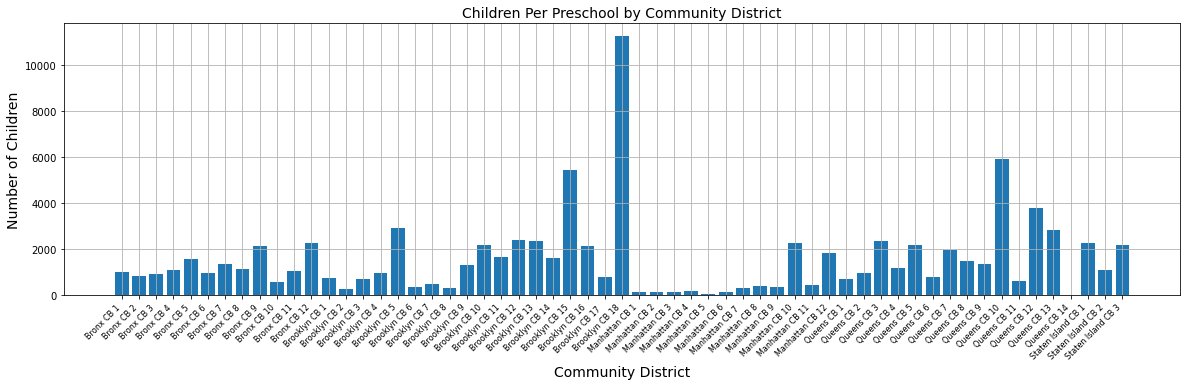

In [121]:
plt.figure(figsize=(20,5)) 
plt.bar(df_data_8['Community District'], df_data_8['Child Per Preschool'])
plt.title('Children Per Preschool by Community District', fontsize=14)
plt.xlabel('Community District', fontsize=14)
plt.xticks(rotation=45, fontsize='8', horizontalalignment='right')
plt.ylabel('Number of Children', fontsize=14)
plt.grid(True)
plt.show()

In [122]:
df_data_8.replace([np.inf, -np.inf], np.nan, inplace=True) 
df_data_8

df_data_8.dropna(inplace=True) #dropping Queens CB 14 as it is a zone without preschools which distrupts the data. it is still an impotant data point however.



In [123]:
df_data_8

,Community District,Population of Children Under 5,Number of Preschools (within 1000 meters),Child Per Preschool
0,Bronx CB 1,5962,6,993.667
1,Bronx CB 2,3404,4,851.000
2,Bronx CB 3,7414,8,926.750
3,Bronx CB 4,12191,11,1108.273
4,Bronx CB 5,11080,7,1582.857
5,Bronx CB 6,7739,8,967.375
6,Bronx CB 7,10725,8,1340.625
7,Bronx CB 8,6729,6,1121.500
8,Bronx CB 9,10738,5,2147.600
9,Bronx CB 10,4437,8,554.625


In [124]:
!pip install jenkspy
import jenkspy

     |████████████████████████████████| 55 kB 4.2 MB/s  eta 0:00:01
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp37-cp37m-linux_x86_64.whl size=77931 sha256=f6728a781634be9db9397afba5227c0a14abacdcb6ed8c874370292e6556a97c
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/d8/d1/42/9bd05164ef706b84674905892f0542f8db6ac4a652473ca7e0
Successfully built jenkspy


In [125]:
breaks = jenkspy.jenks_breaks(df_data_8['Child Per Preschool'], nb_class=4)
print(breaks)



[57.03225806451613, 1344.857142857143, 2923.6, 5893.0, 11234.0]


In [126]:
df_data_8['Area Service Level'] = pd.cut(df_data_8['Child Per Preschool'],
                        bins=breaks,
                        labels=['Good', 'Under Served', 'Heavily Under Served', 'Dire Need'], include_lowest=True)

In [127]:
df_data_8

,Community District,Population of Children Under 5,Number of Preschools (within 1000 meters),Child Per Preschool,Area Service Level
0,Bronx CB 1,5962,6,993.667,Good
1,Bronx CB 2,3404,4,851.000,Good
2,Bronx CB 3,7414,8,926.750,Good
3,Bronx CB 4,12191,11,1108.273,Good
4,Bronx CB 5,11080,7,1582.857,Under Served
5,Bronx CB 6,7739,8,967.375,Good
6,Bronx CB 7,10725,8,1340.625,Good
7,Bronx CB 8,6729,6,1121.500,Good
8,Bronx CB 9,10738,5,2147.600,Under Served
9,Bronx CB 10,4437,8,554.625,Good


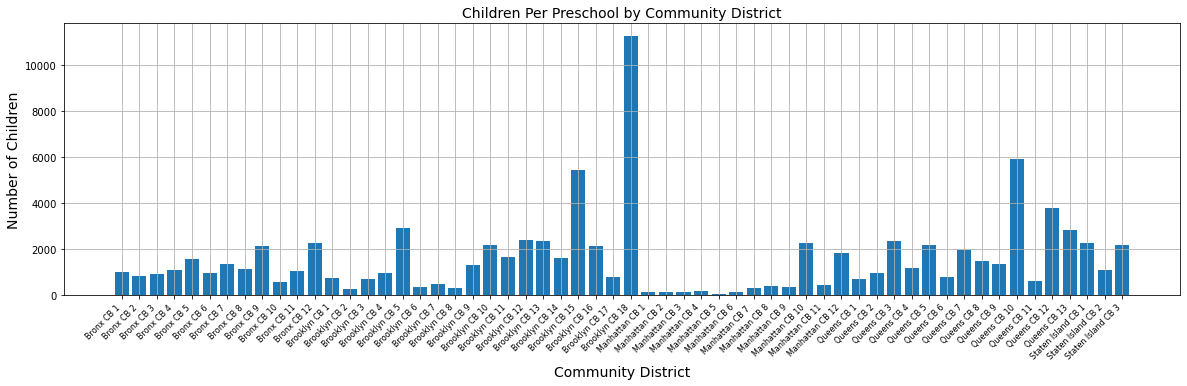

In [128]:
plt.figure(figsize=(20,5)) 
plt.bar(df_data_8['Community District'], df_data_8['Child Per Preschool'])
plt.title('Children Per Preschool by Community District', fontsize=14)
plt.xlabel('Community District', fontsize=14)
plt.xticks(rotation=45, fontsize='8', horizontalalignment='right')
plt.ylabel('Number of Children', fontsize=14)
plt.grid(True)
plt.show()

In [161]:
freq_service=df_data_8['Area Service Level'].value_counts()

In [162]:
freq_service=pd.DataFrame(freq_service)

In [163]:
freq_service.reset_index(inplace=True)

In [164]:
freq_service

,index,Area Service Level
0,Good,35
1,Under Served,19
2,Heavily Under Served,3
3,Dire Need,1


In [165]:
freq_service=freq_service.rename({'index': 'Area Service Level','Area Service Level':'Frequency'}, axis= 'columns')

In [166]:
freq_service

,Area Service Level,Frequency
0,Good,35
1,Under Served,19
2,Heavily Under Served,3
3,Dire Need,1


<BarContainer object of 4 artists>

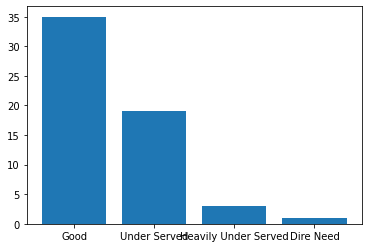

In [167]:
plt.bar(freq_service['Area Service Level'], freq_service['Frequency'])